In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Машина опорных векторов

SVM — Support Vector Machine
* Метод обобщенного портрета (оптимальная разделяющая гиперплоскость) —
60–70 гг. В.Н. Вапник и др., см. _В.Н. Вапник, А. Я. Червоненкис_ «Теория
распознавания образов». М.: Наука, 1974

* Добавлены ядра — [Cortes, Vapnik, 1995]

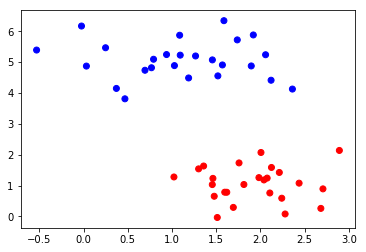

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, centers = ((1, 5), (2, 1)), random_state = 0, cluster_std = 0.6)
colors = np.array(['b', 'r'])[y]
plt.scatter(X[:, 0], X[:, 1], color = colors)

(-1, 3.5)

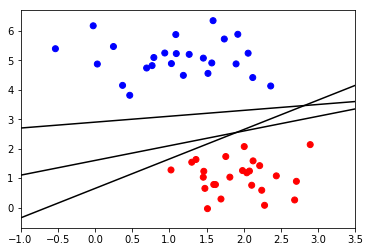

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], color = colors)
for m, b in [(1, 0.65), (0.5, 1.6), (0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)

(-1, 3.5)

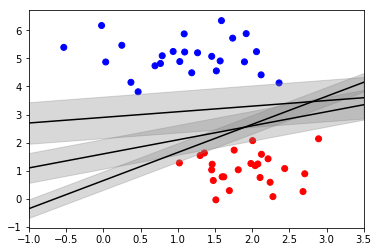

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], color = colors)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.53), (0.2, 2.9, 0.74)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = None, color = 'gray', alpha = 0.3)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def draw_sep_curve(model):
    x0_min, x0_max = plt.xlim()
    x1_min, x1_max = plt.ylim()
    x0 = np.linspace(x0_min, x0_max, 30)
    x1 = np.linspace(x1_min, x1_max, 30)
    X1, X0 = np.meshgrid(x1, x0)
    P = np.zeros(X0.shape)
    for i, x0i in enumerate(x0):
        for j, x1j in enumerate(x1):
            P[i, j] = model.decision_function([[x0i, x1j]])
    plt.contour(X0, X1, P, colors = 'k', levels=[-1, 0, 1], alpha = 0.8, linestyles=['--', '-', '--'])
    plt.xlim((x0_min, x0_max))
    plt.ylim((x1_min, x1_max)) 

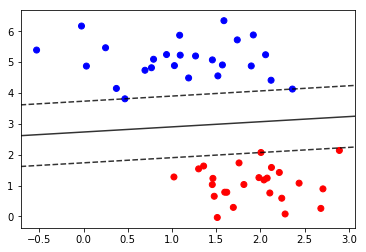

In [7]:
plt.scatter(X[:, 0], X[:, 1], color = colors)
draw_sep_curve(svc_model)

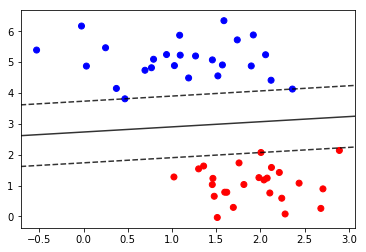

In [8]:
plt.scatter(X[:, 0], X[:, 1], color = colors)
draw_sep_curve(svc_model)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s = 200, facecolors = 'none')

In [9]:
svc_model.support_vectors_

array([[ 0.46732855,  3.81152212],
       [ 2.36185277,  4.1273806 ],
       [ 2.00630001,  2.0715223 ]])

Математическая постановка задачи:
$$ 
\beta, \beta_0 = \mathop{\rm argmin}_{\beta, \beta_0} \frac{1}{2} \|\beta\|^2
$$
при ограничениях
$$
y^{(i)} (\beta^{\top}x^{(i)} + \beta_0) \ge 1,
\qquad
y^{(i)} \in \{-1, 1\}
\qquad
(i = 1,2,\dots, N)
$$

## Перекрывающиеся классы

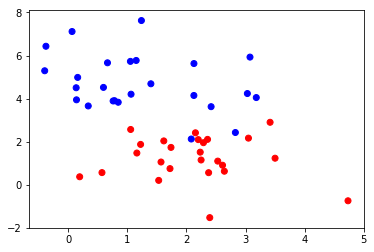

In [10]:
X, y = make_blobs(n_samples = 50, centers = ((1, 5), (2, 1)), random_state = 1, cluster_std = 1.25)
#X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 1)
colors = np.array(['b', 'r'])[y]
plt.scatter(X[:, 0], X[:, 1], color = colors)

In [11]:
svc_model = SVC(kernel = 'linear', C = 1)
svc_model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(-1, 5)

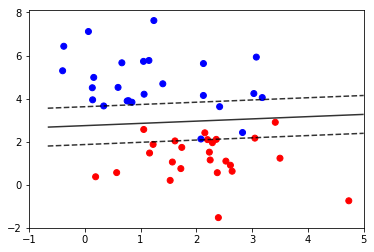

In [12]:
plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s = 200, facecolors = 'none')
draw_sep_curve(svc_model)
plt.xlim((-1, 5))

Математическая постановка задачи:
$$ 
\beta, \beta_0, \xi = \mathop{\rm argmin}_{\beta, \beta_0, \xi} \frac{1}{2} \|\beta\|^2 
+ C \sum_{i=1}^N \xi_i
$$
при ограничениях
$$
y^{(i)} (\beta^{\top}x^{(i)} + \beta_0) \ge 1 - \xi_i,
\qquad
\xi_i \ge 0
\qquad
(i = 1,2,\dots, N)
$$

<function __main__.draw_svc>

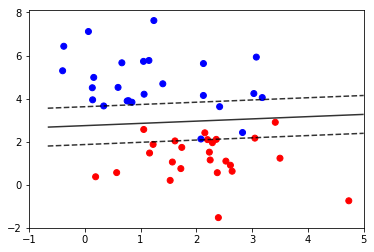

In [13]:
from IPython.html.widgets import interact

def draw_svc(C = 1):
    svc_model = SVC(kernel = 'linear', C = C)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = colors)
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
                s = 200, facecolors = 'none')
    draw_sep_curve(svc_model)
    plt.xlim((-1, 5))
    
interact(draw_svc, C = (0.01, 20, 0.01))    

## Ядра

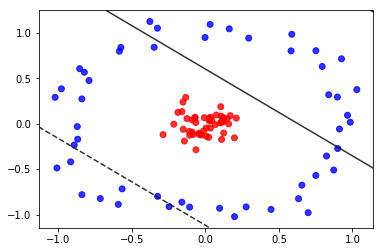

In [14]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = .1, noise = 0.1)

svc_model = SVC(kernel = 'linear', C = 1).fit(X, y)
colors = np.array(['b', 'r'])[y]

plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.8)
draw_sep_curve(svc_model)

Ядро задает скалярное произведение в спрямленном пространстве.

_Линейное ядро_ – это обычное скалярное произведение: $k(x, x') = x^{\top} x'$ – спрямленное пространство совпадает с исходным.

## Радиальное ядро
_Радиальная функция_ (radial basis function – RBF):
$$
    r = e^{-\gamma(x_1^2 + x_2^2 + \dots + x_d^2)}
$$
_Радиальное ядро_:
$$
k(x, x') = e^{-\gamma \|x-x'\|^2}
$$

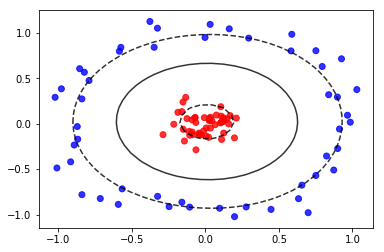

In [15]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.8)
draw_sep_curve(svc_model)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=200, facecolors='none')

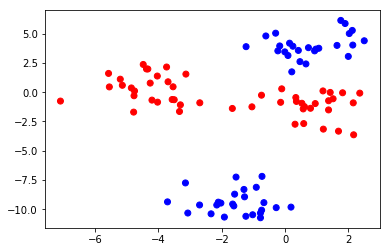

In [16]:
X0, y0 = make_blobs(n_samples = 50, centers = 2, random_state = 2, cluster_std = 1)
X1, y1 = make_blobs(n_samples = 50, centers = 2, random_state = 3, cluster_std = 1)
X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])
colors = np.array(['b', 'r'])[y]
plt.scatter(X[:, 0], X[:, 1], color = colors)

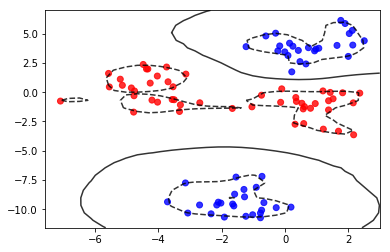

In [17]:
def draw_svc(C = 1, gamma = 0.5):
    svc_model = SVC(kernel = 'rbf', C = C, gamma = gamma)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.8)
    draw_sep_curve(svc_model)
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=200, facecolors='none')
    
interact(draw_svc, C = (0.01, 30, 0.01), gamma = (0, 10, 0.01))
pass

## Полиномиальное ядро

$$
k(x, x') = (\gamma\, x^{\top} x' + c_0)^{\delta}
$$


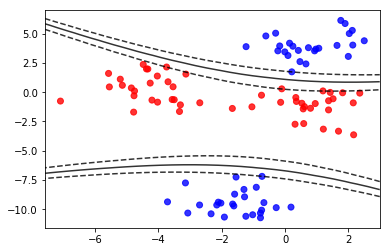

In [18]:
def draw_svc(C = 1, degree = 2, gamma = 0.5, coef0 = 10):
    svc_model = SVC(kernel = 'poly', C = C, degree = degree, 
                    gamma = gamma, coef0 = coef0)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.8)
    draw_sep_curve(svc_model)
    #plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
interact(draw_svc, C = (0.01, 30, 0.01), degree = (1, 8), gamma = (0, 1, 0.01))
pass

## Сигмоидальное ядро
$$
k(x, x') = 
\mathop{\rm th}(\gamma x^{\top} x' + c_0), 
\qquad
\mathop{\rm th} x = \frac{e^x- e^{-x}}{e^x + e^{-x}}
$$
Гиперболический тангенс $\mathop{\rm th} x$ – это тот же элементарный сигмоид, только сдвинутый и растянутый по вертикальной оси.

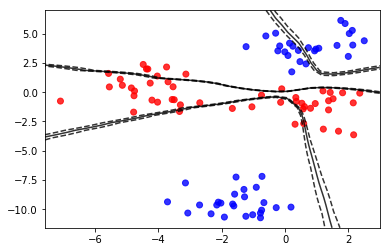

In [19]:
def draw_svc(C = 1, gamma = 0.5):
    svc_model = SVC(kernel = 'sigmoid', C = C, gamma = gamma, coef0 = 1)
    svc_model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.8)
    draw_sep_curve(svc_model)
    #plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
interact(draw_svc, C = (0.01, 30, 0.01), gamma = (0, 1, 0.01))
pass